###Data Understanding

○	Describe the dataset, report should include at minimum: 
-	Indication of missing values, type of values, unique values
-	Descriptive statistics where applicable 
-	Correlations analysis (See Person, Spearman)
-	Duplicates (and deduplicate if applies )


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_orig = pd.read_csv("H:/data_X/penguins.csv")
data_orig.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
data_orig.isnull().sum()

species               0
island                0
bill_length_mm        5
bill_depth_mm         5
flipper_length_mm     6
body_mass_g           5
sex                  14
year                  0
dtype: int64

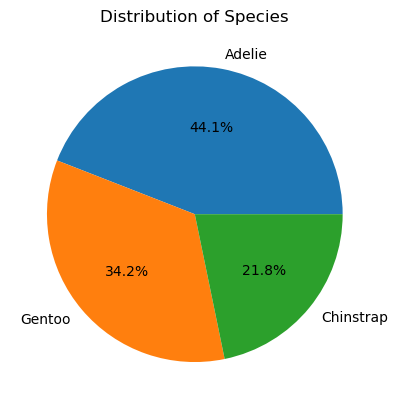

In [5]:
species_count = data_orig['species'].value_counts()

# Create pie chart
plt.pie(species_count.values, labels=species_count.index, autopct='%1.1f%%')
plt.title('Distribution of Species')
plt.show()

In [6]:
data_orig.shape

(363, 8)

In [7]:
data_orig.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,363,363,358.000000,358.000000,357.000000,358.000000,349,363.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,female,NaN
freq,160,170,NaN,NaN,NaN,NaN,175,NaN
mean,NaN,NaN,43.926257,17.205587,200.451261,4173.743017,NaN,2007.991736
std,NaN,NaN,5.441240,1.951749,14.000754,796.395388,NaN,0.829323
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.350000,15.700000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.450000,17.500000,197.000000,3950.000000,NaN,2008.000000
75%,NaN,NaN,48.500000,18.700000,213.000000,4743.750000,NaN,2009.000000


In [8]:
data_orig.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [9]:
print(data_orig.duplicated().sum())

13


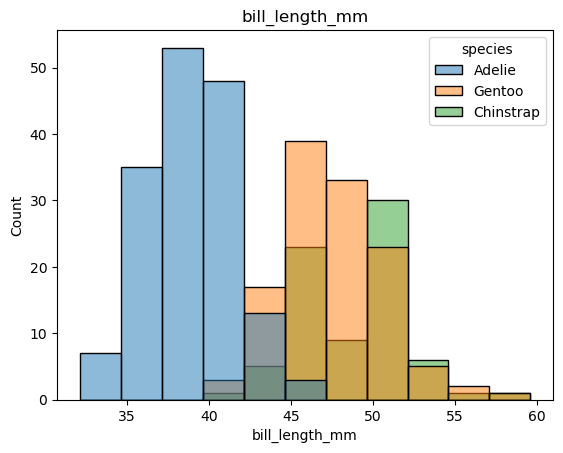

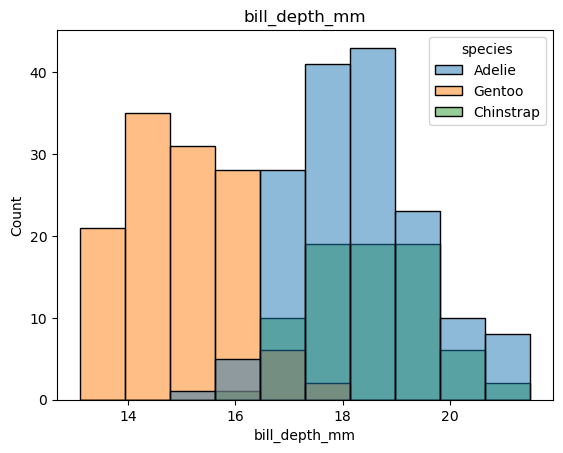

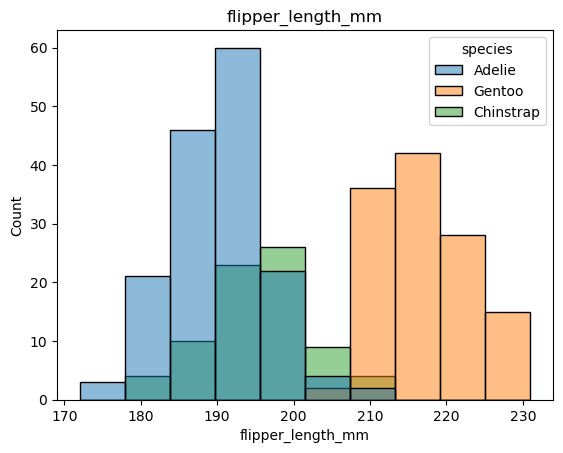

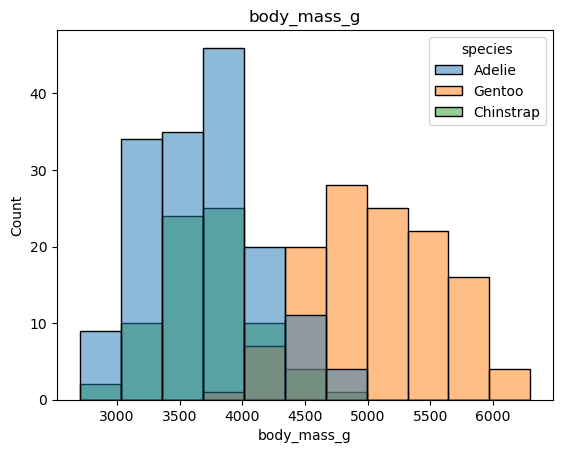

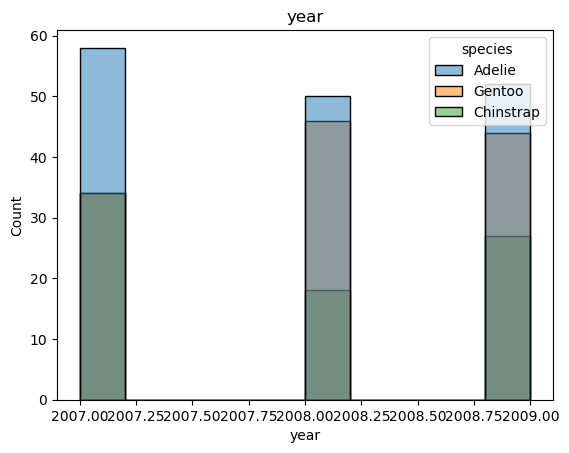

In [10]:
#overlapping hists
for col in data_orig.select_dtypes(include=[np.number]):
    sns.histplot(data_orig, x=col, hue='species', kde=False)
    plt.title(col)
    plt.show()

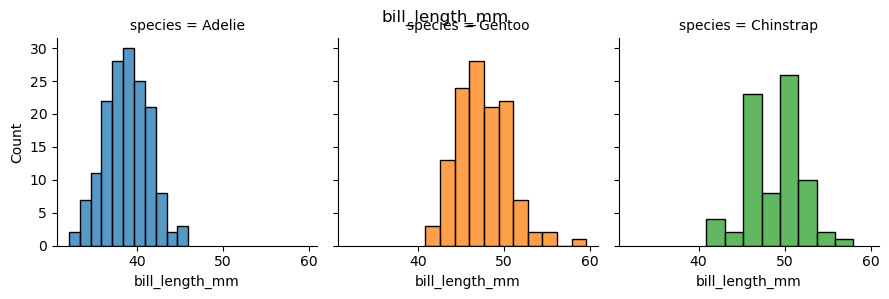

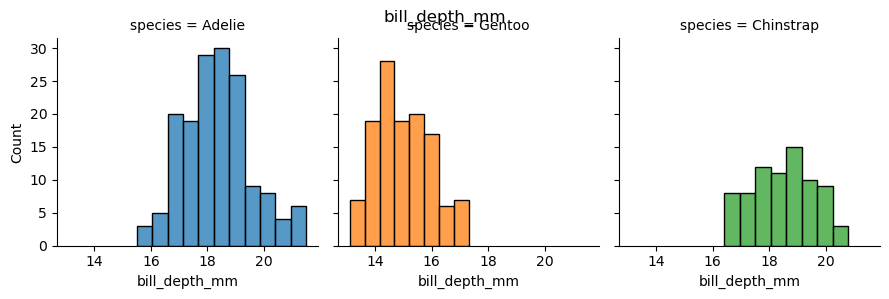

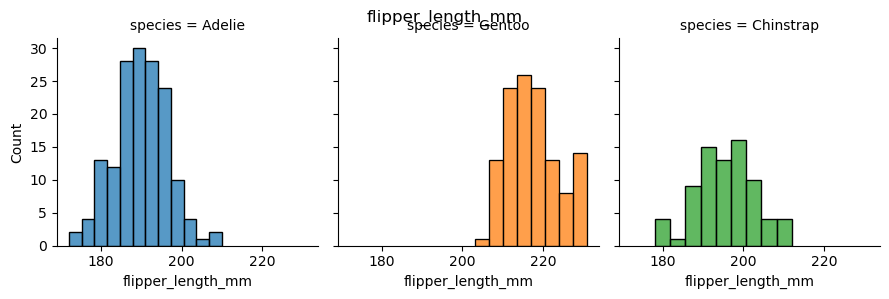

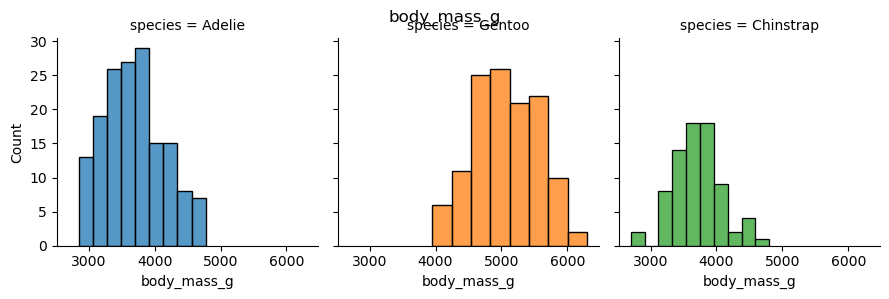

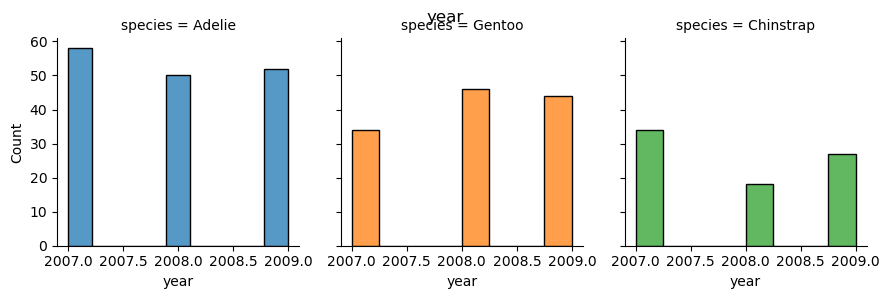

In [11]:
#faceted hists
for col in data_orig.select_dtypes(include=[np.number]):
    g = sns.FacetGrid(data_orig, col='species',hue="species")
    g.map(sns.histplot, col)
    plt.suptitle(col)
    plt.show()

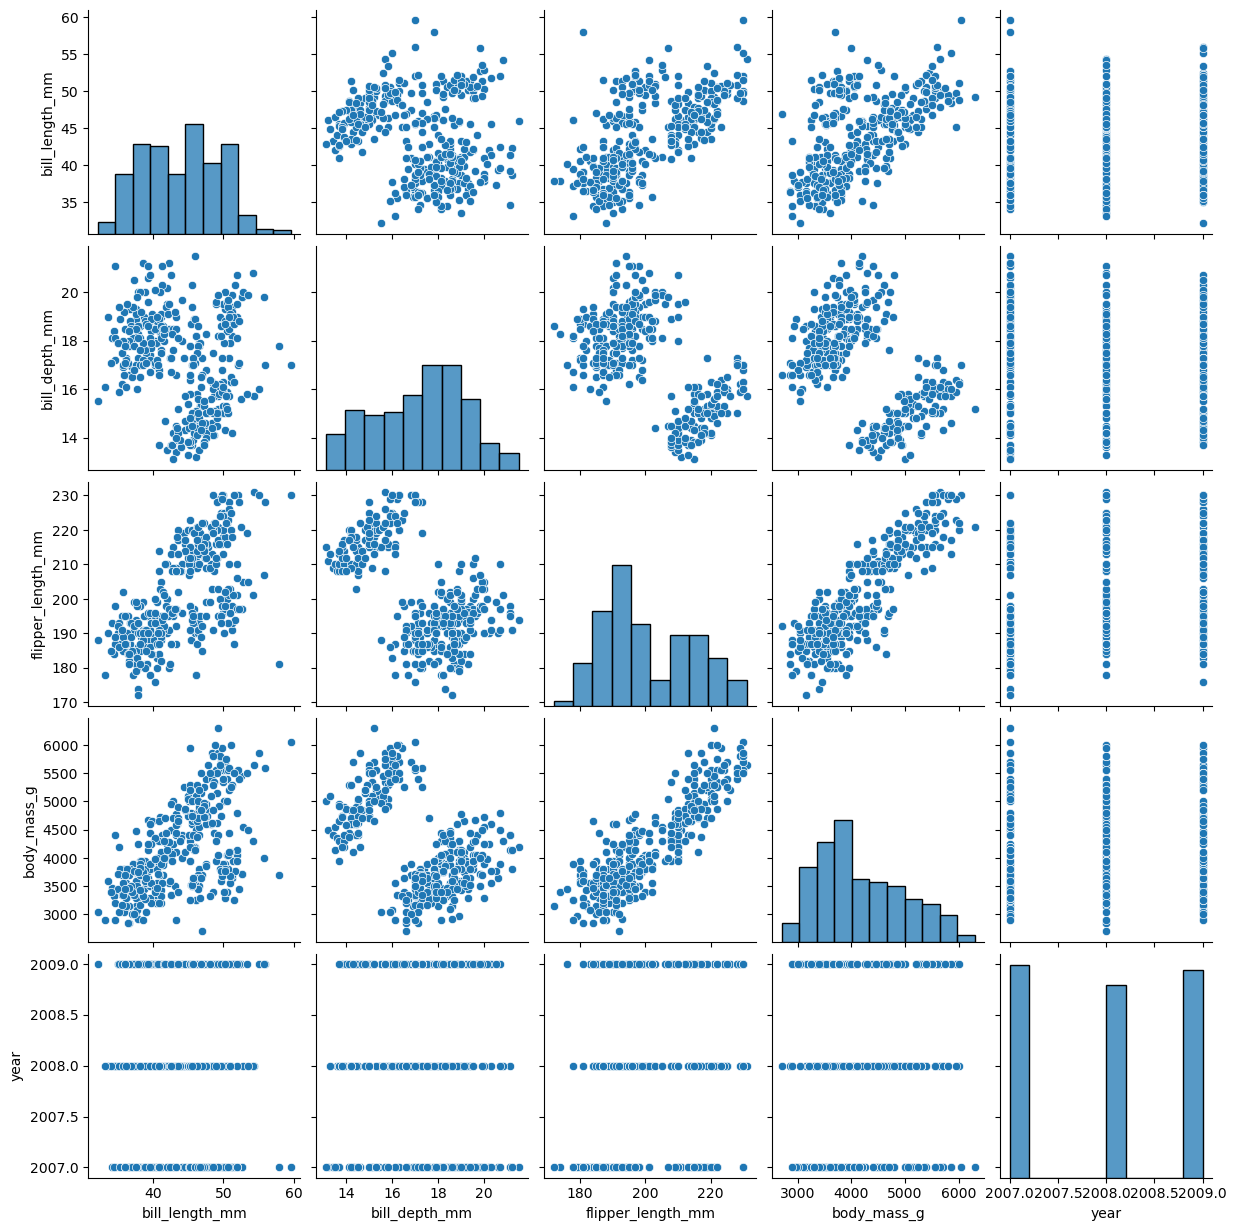

In [12]:
#pairplot
sns.pairplot(data_orig.select_dtypes(include=[np.number]))
plt.show()

C:\Users\novv20\AppData\Local\Temp\ipykernel_3720\781375405.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_orig.corr(), annot=True, cmap='coolwarm')


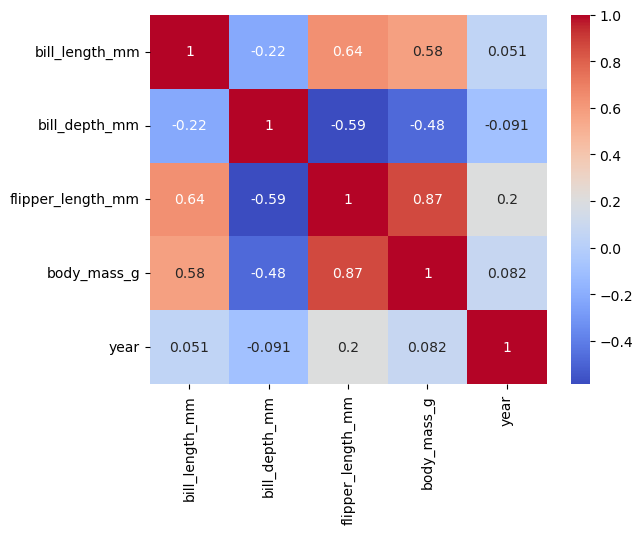

In [13]:
numeric_cols = data_orig.select_dtypes(exclude=['object']).columns
corr_matrix = data_orig[numeric_cols].corr()

#heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Data visualization

The graph below shows the frequency of species on individual islands. It can be seen that the Adelie species occurs on all three islands. At the same time, it occurs similarly frequently on these islands. The Gentoo species was observed only on Biscoe Island, the Chinstrap species was observed only on Dream Island. If we come across a penguin on Torgersen Island, it can be assumed that it will be an Adelie species. For penguins on other islands, we will need more information to identify the species.

<Axes: xlabel='island', ylabel='count'>

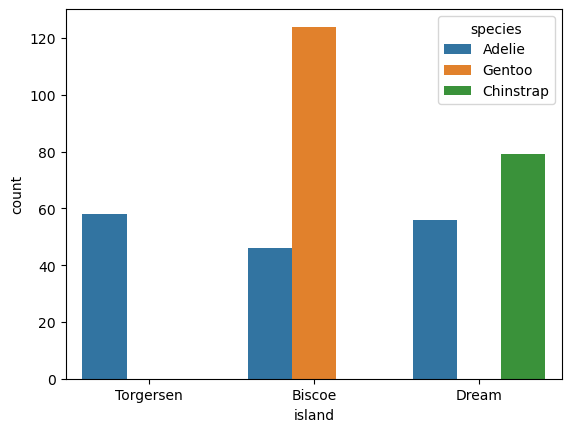

In [20]:
data_con = data_orig.select_dtypes('float64')
sns.countplot(data_orig, x = 'island', hue = 'species')

It can be expected that it will be appropriate to use body measures for further analysis. In the boxplots below, you can see that the dimensions take on different values for the species. It can also be noticed that the dimensions of Adelia are the same on different islands.

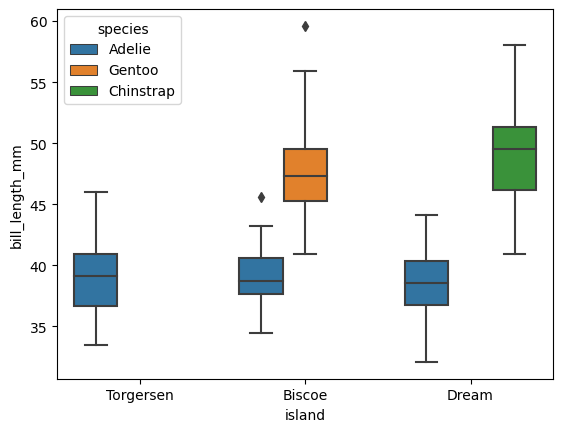

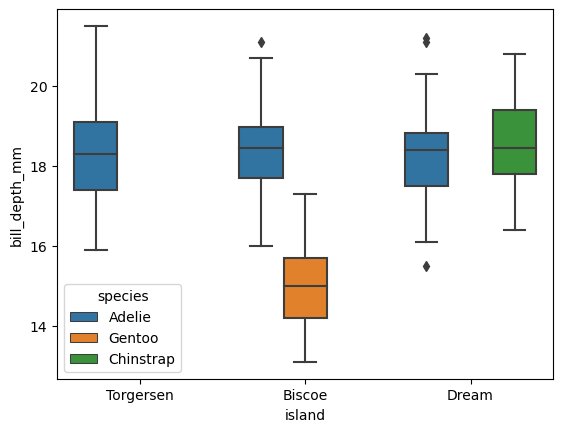

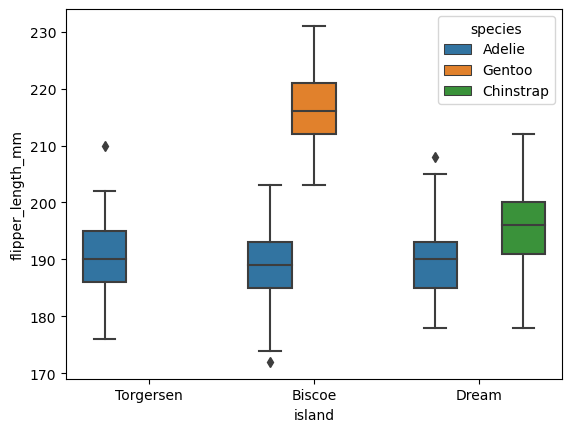

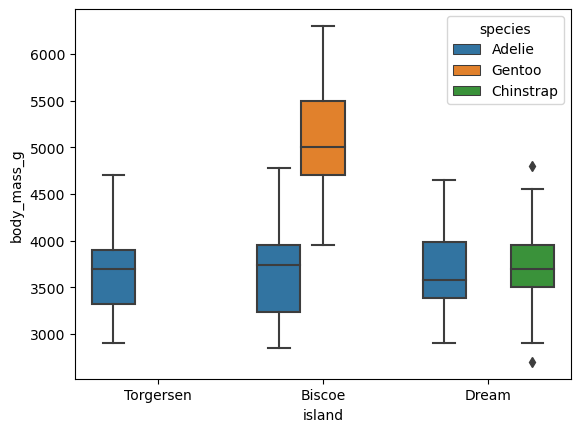

In [16]:
for col in data_con:
    sns.boxplot(data_orig, x = 'island', y = col, hue = 'species')
    plt.show()

Now we will focus on the relationships of individual variables with body measures. It is clear from the scatterplots that there are positive linear relationships between the variables. In some cases, clusters corresponding to species can be identified in the graphs. These variables can be expected to be very helpful in distinguishing species.
From the histograms and scatterplots, it can be seen that the Gentoo will be the largest species of penguin, as they are the heaviest and have the longest flipper. The other two species are similar in size. We will look for the differences between Adelie and Chinstrap in the bill measures. Adelies have a shorter bill compared to other species. They have a greater bill depth. Chinstraps have a longer bill with greater depth. Gentoo have a longer bill, but compared to other species, their bill have smaller depth.

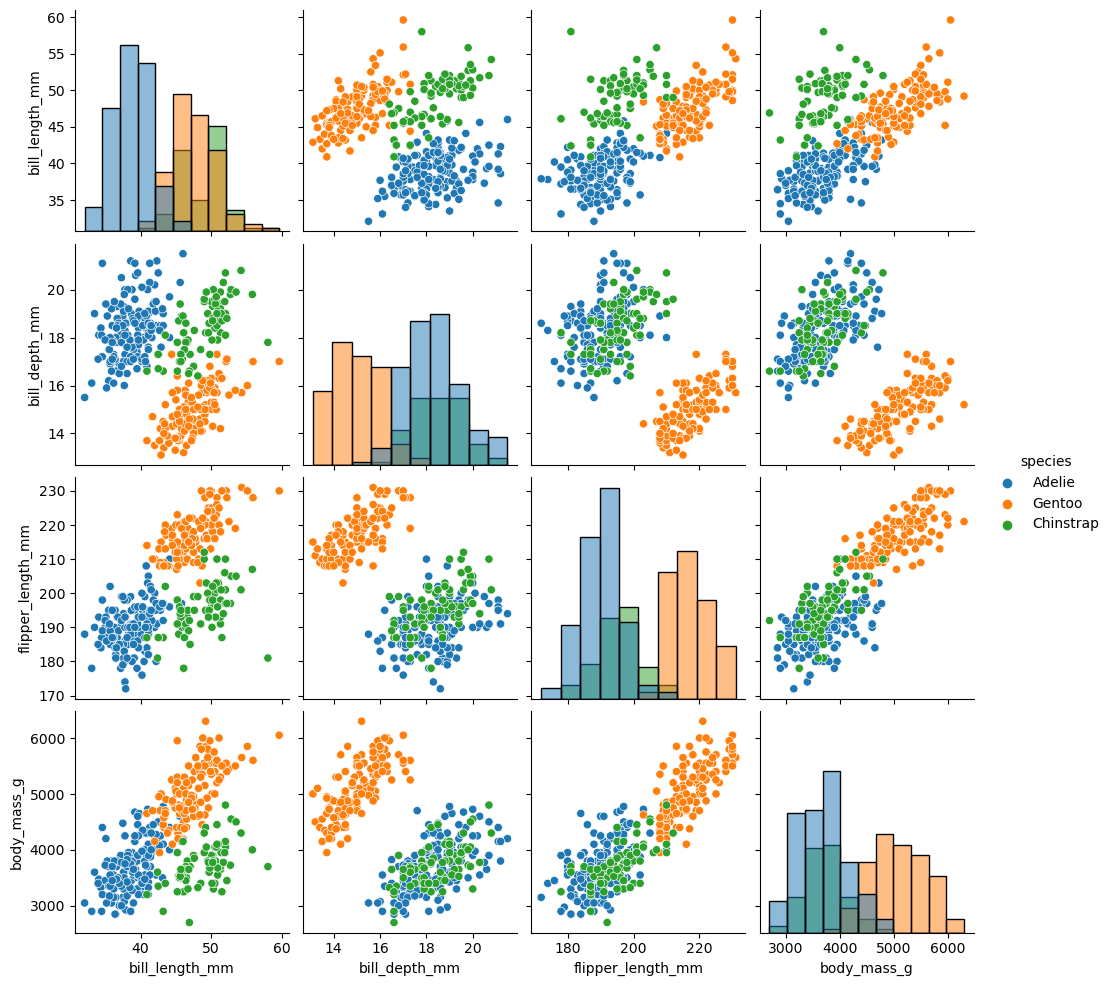

In [17]:
sns.pairplot(data_orig.loc[:,data_orig.columns != 'year'], hue = 'species', diag_kind="hist" )
plt.show()

For all variables with body measures, it can be observed that females reach lower values. The differences between each species are very similar for both sexes. On the basis of these judgments, we do not expect a large contribution of variable sex in recognizing species.

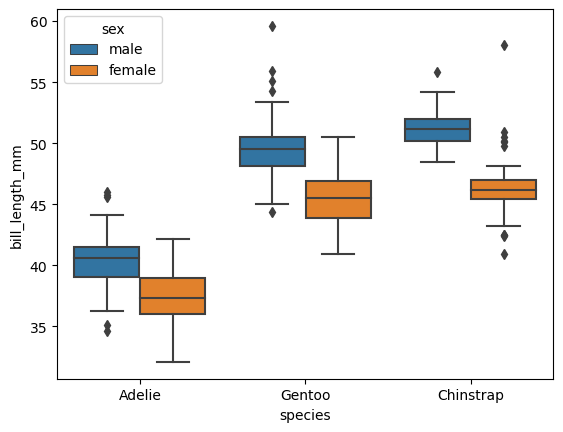

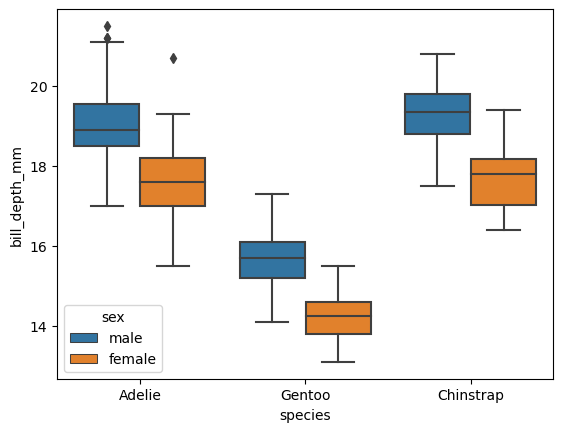

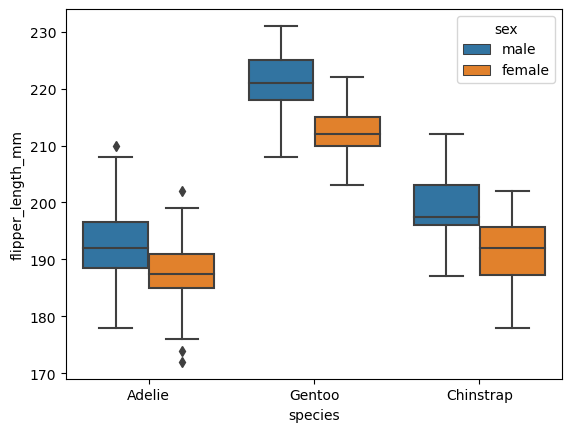

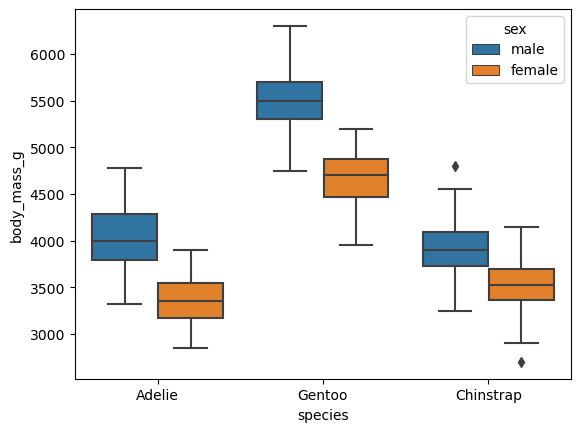

In [18]:
for col in data_con:
    sns.boxplot(data_orig, x = 'species', y = col, hue = 'sex')
    plt.show()

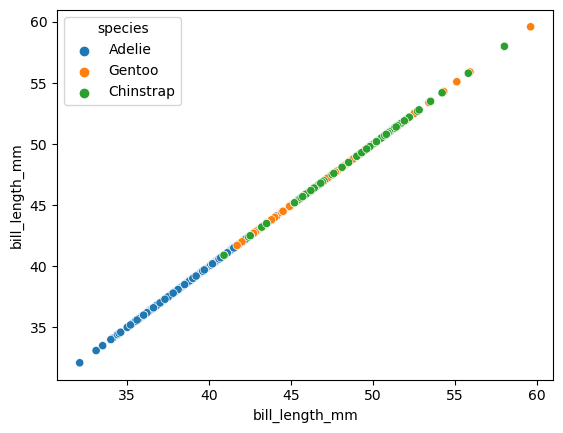

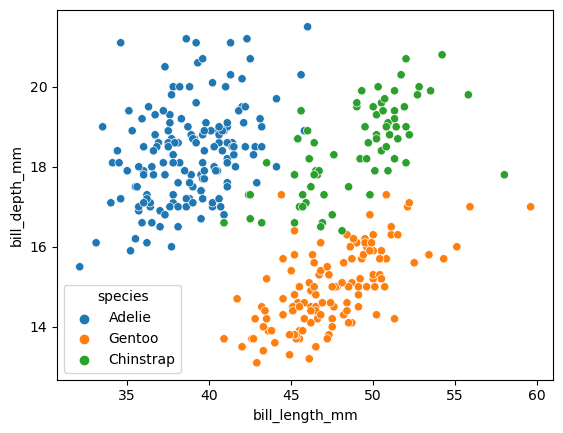

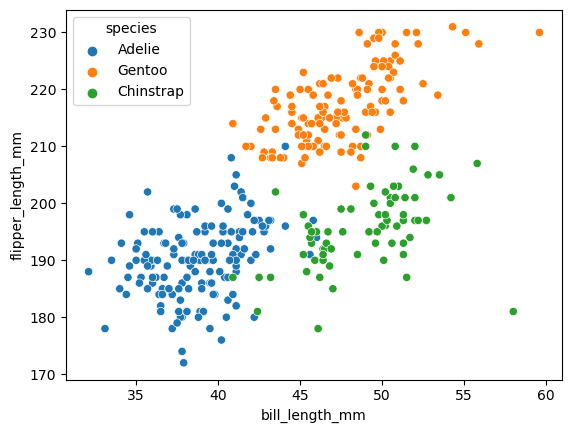

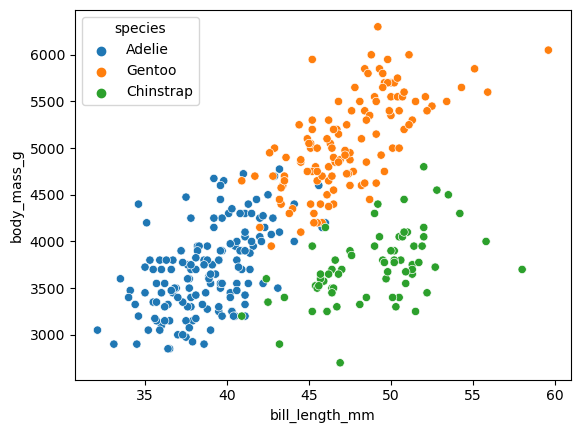

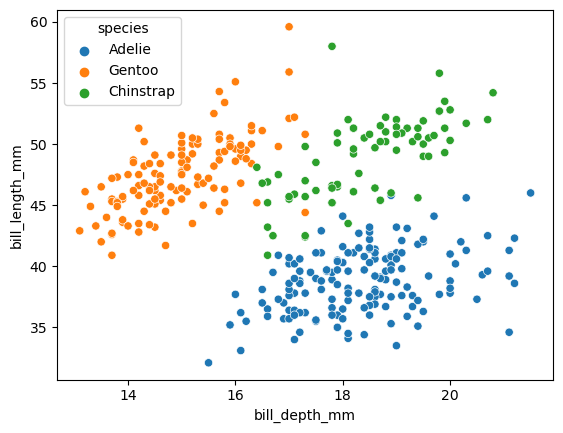

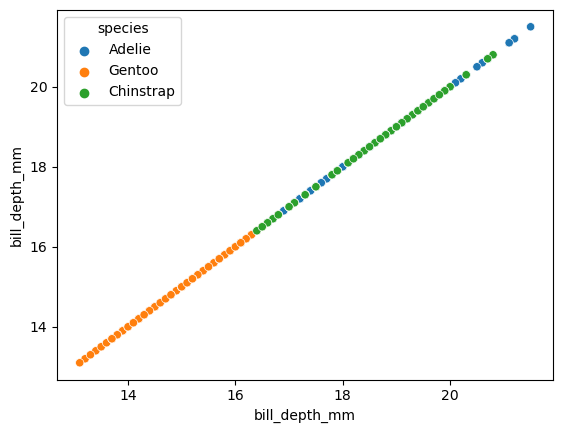

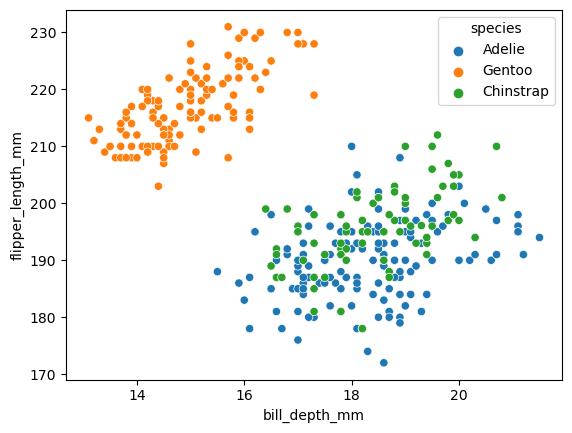

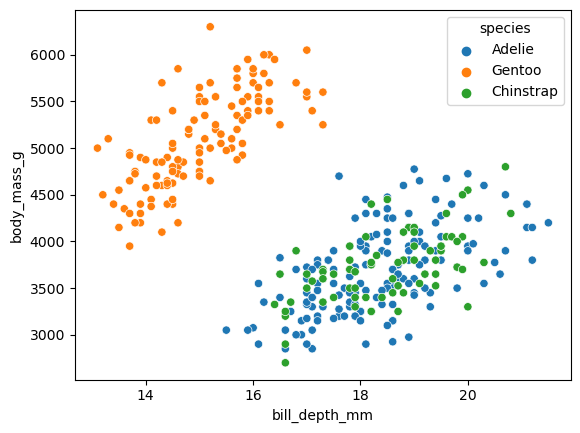

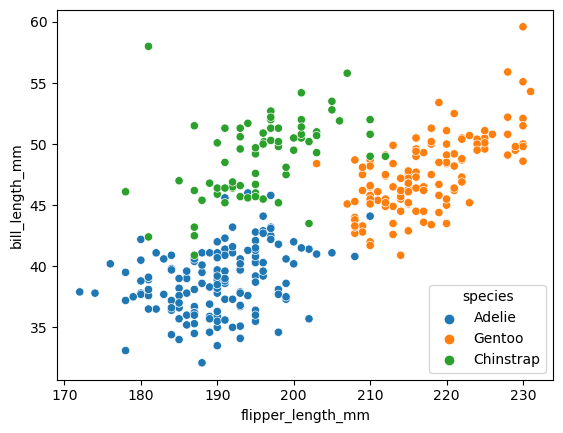

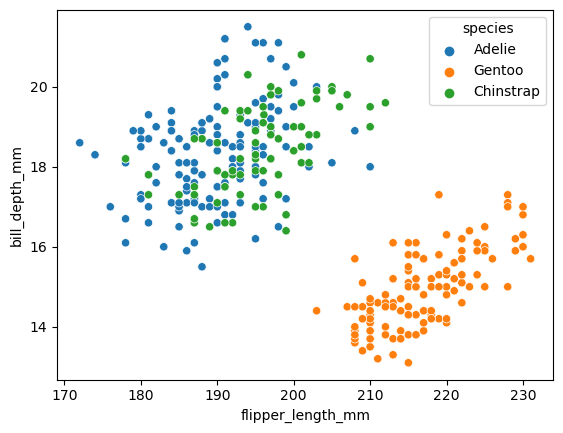

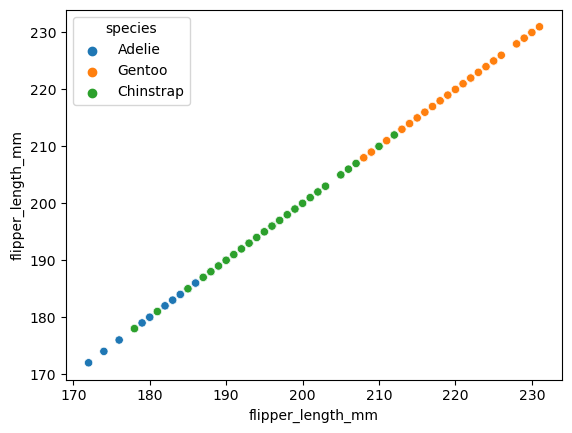

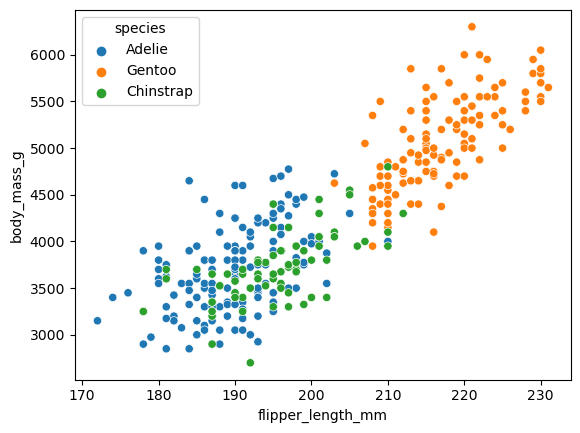

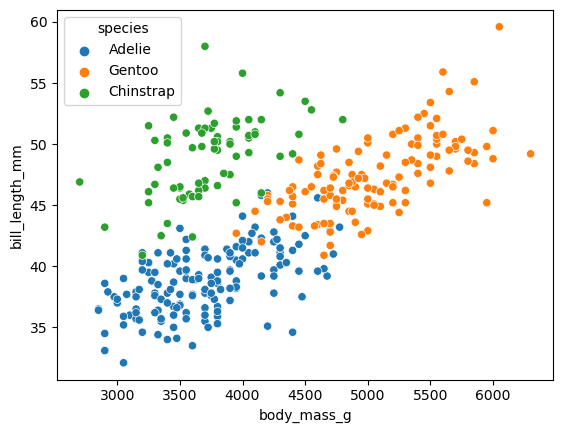

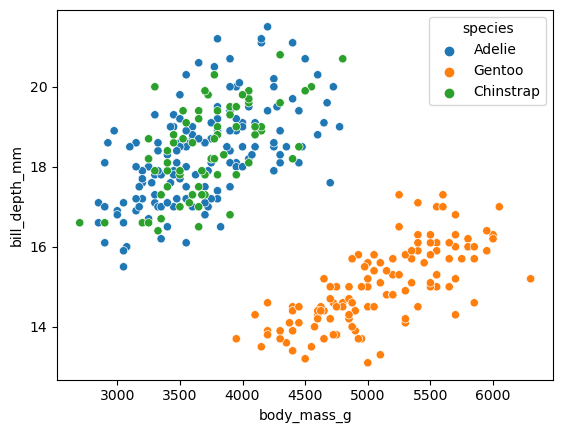

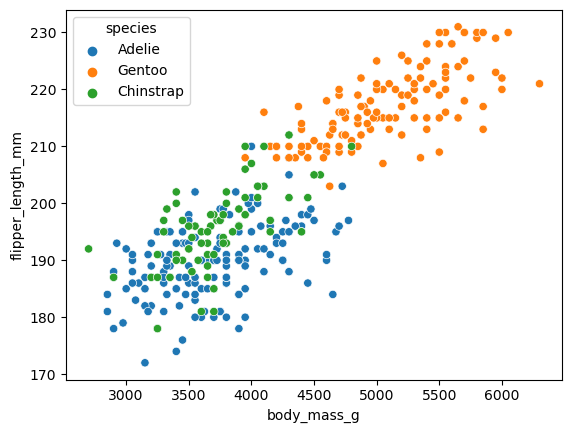

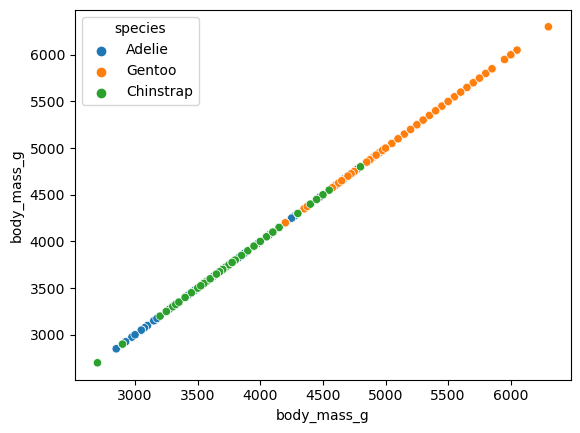

In [19]:
for col in data_con:
    for i in range(len(data_con.columns)):
        sns.scatterplot(data_orig, x=col,  y = data_con.iloc[:,i],
                                 hue='species')
        plt.show()
